In [1]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `hist` mode scenario of `plot` class.

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.insert(0, '../..')
from batchflow import plot

In [3]:
# Sample data generation
shape = (50, 50)

image_0 = np.random.normal(loc=2, size=shape)
image_1 = np.random.normal(scale=2, size=shape)

This is the usual way to display several images.

To make make histogram plot of them, simply specify the mode of the same name.

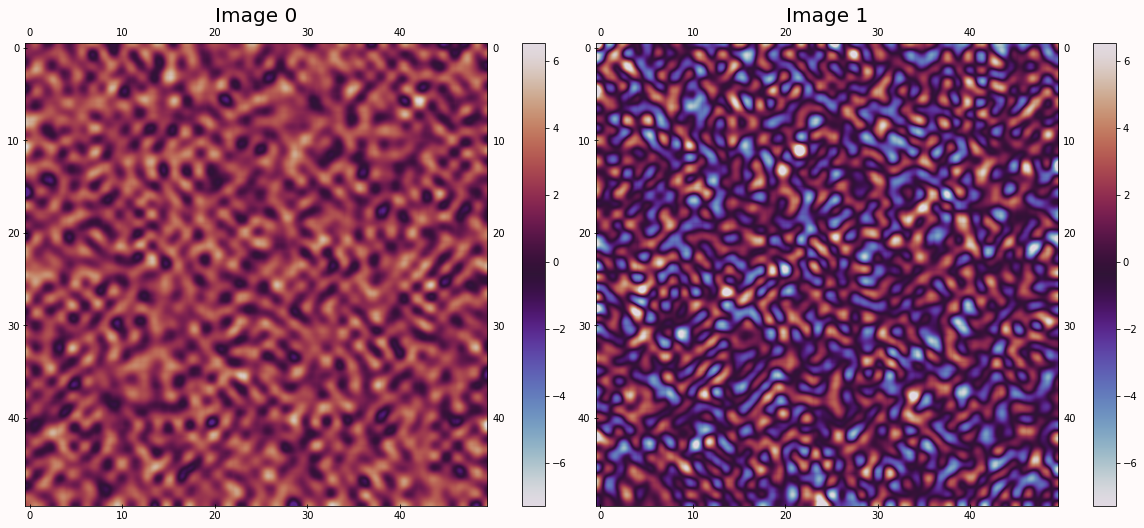

In [4]:
plot(
    data=[image_0, image_1],
    combine='separate',
    cmap='twilight',
    interpolation='sinc',
    colorbar=True,
    title=['Image 0', 'Image 1'],
    vmin=(min(image_0.min(), image_1.min())),
    vmax=(max(image_0.max(), image_1.max()))
    )

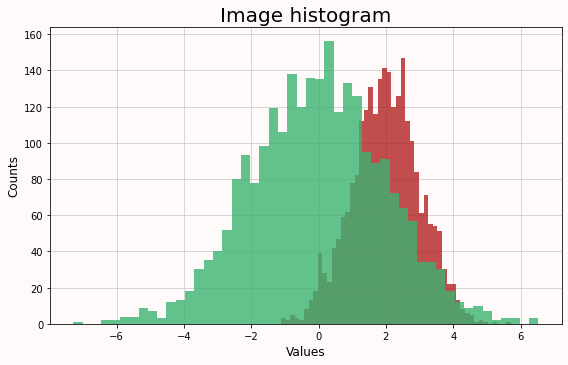

In [5]:
plot(
    data=[image_0, image_1],
    mode='hist',
    title_label='Image histogram')

When parameter name collision occurs, simply prefix it with specific method alias followed by underscore.

Example below show, how to specify that `label` argument is meant for legend (and not for title or tick labels).

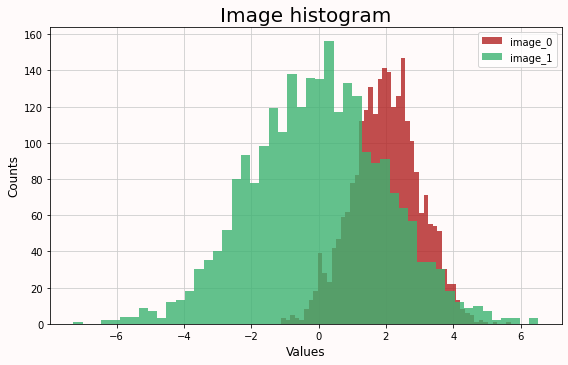

In [6]:
plot(
    data=[image_0, image_1],
    mode='hist',
    title_label='Image histogram',
    label=['image_0', 'image_1'])

There are a few default params, but to use more advanced prefix names to specify the method they are meant for.

Example below shows, how to specify `histtype` argument is redirected to the list of parameters for `plt.hist` via prefix.

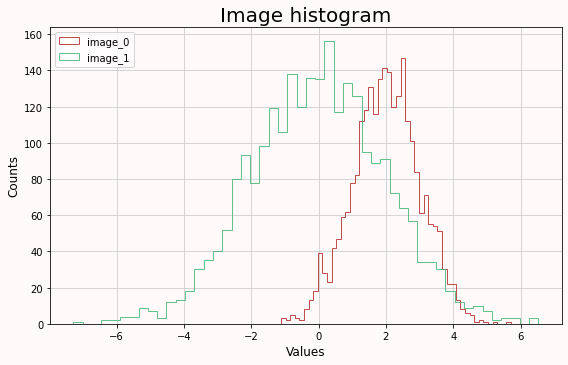

In [7]:
plot(
    data=[image_0, image_1],
    mode='hist',
    title_label='Image histogram',
    label=['image_0', 'image_1'],
    hist_histtype='step'
    )

To display histograms separately use `combine='separate'` bool flag.

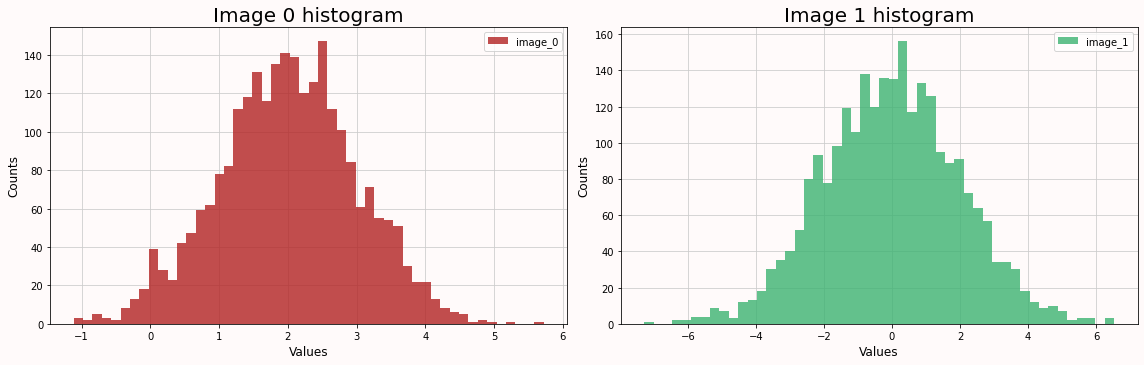

In [8]:
plot(
    data=[image_0, image_1],
    mode='hist',
    combine='separate',
    title_label=['Image 0 histogram', 'Image 1 histogram'],
    label=['image_0', 'image_1'],
    )

To display histograms in 'mixed' manner, i.e. with some histograms overlaid and some displayed separately, use nested lists of histograms arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

Note, that parameters should have same nestedness level.

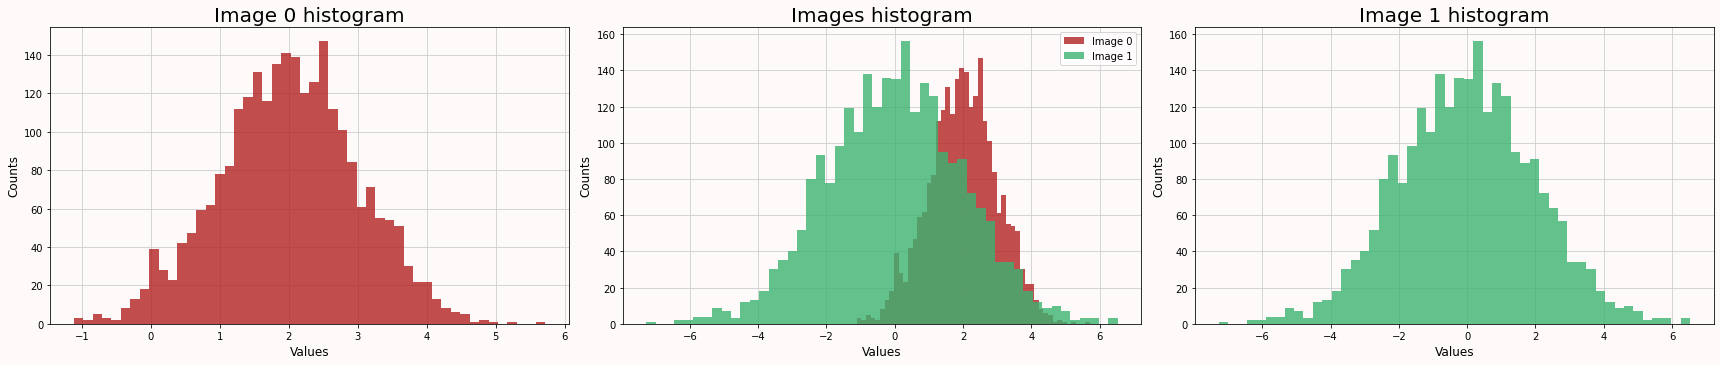

In [9]:
plot(
    data=[image_0, [image_0, image_1], image_1],
    mode='hist',
    combine='separate',
    color=['firebrick', ['firebrick', 'mediumseagreen'], 'mediumseagreen'],
    title=['Image 0 histogram', 'Images histogram', 'Image 1 histogram'],
    label=[None, ['Image 0', 'Image 1'], None],
    )

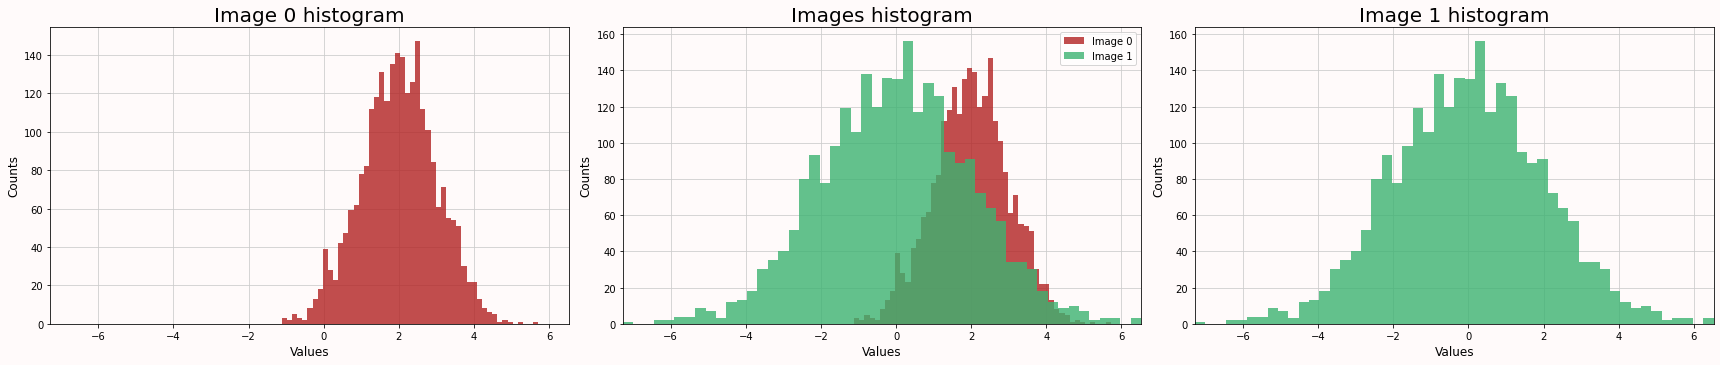

In [10]:
plot(
    data=[image_0, [image_0, image_1], image_1],
    mode='hist',
    combine='separate',
    color=['firebrick', ['firebrick', 'mediumseagreen'], 'mediumseagreen'],
    title=['Image 0 histogram', 'Images histogram', 'Image 1 histogram'],
    label=[None, ['Image 0', 'Image 1'], None],
    xlim=(min(image_0.min(), image_1.min()), max(image_0.max(), image_1.max()))
    )

To create plots with mixed-type visualizations one can provide shapes for future subplots or use `None` placeholder in `data`.

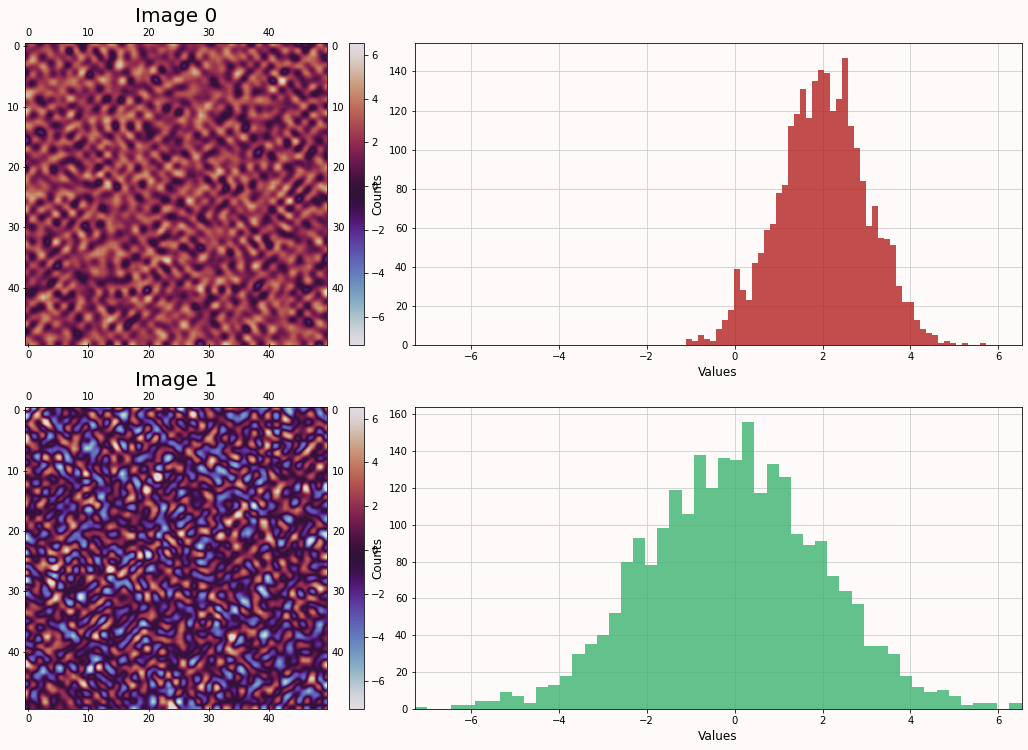

In [11]:
canvas = plot(
    data=[image_0, None, image_1, None],
    mode='imshow',
    combine='separate',
    ncols=2,
    cmap='twilight',
    interpolation='sinc',
    colorbar=True,
    title=['Image 0', 'Image 1'],
    vmin=(min(image_0.min(), image_1.min())),
    vmax=(max(image_0.max(), image_1.max()))
)

canvas.plot(
    data=[None, image_0, None, image_1],
    mode='hist',
    combine='separate',
    xlim=(min(image_0.min(), image_1.min()), max(image_0.max(), image_1.max()))
    )